In [1]:
import os
import sys

os.chdir('..')
sys.path.append('src')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from collections import Counter
#from utilsOptuna import best_trial_scores_ML, best_trial_scores_DL
from utilsPlots import na_plot, plot_density

## Objective

This exercise aims to develop a machine learning model to predict prices for new accommodations based on the available data.

## Exploratory data analysis

Data contains 14,780 samples with 89 features. `Price` feature will be considered as target.

In line with the goal of this analysis described above in objetive section, only features related to the accommodation's characteristics (amenities, location, etc.) will be retained, while all data related to reviews, availability, or pricing will be removed.

This applies, for example, when a client has a property with specific features and location, and wants to know at what price to offer accommodation.

The dataset contains no duplicates entries, confirmed by checking the unique identifiers features: `ID`, `Scrape ID` and `Name`. An analysis of missing data revealed that 59 features contain NA values. @fig-na shows the features with the highest percentages of missing values. 


In [3]:
airbnb_data = pd.read_csv("data/airbnb-listings-extract.csv", delimiter = ';') 

In [4]:
print(f'Number of samples: {airbnb_data.shape[0]}')
print(f'Number of features: {airbnb_data.shape[1]}')

Number of samples: 14780
Number of features: 89


In [8]:
# check data structure
airbnb_data.head().T

,0,1,2,3,4
ID,11210388,17471131,17584891,5398030,18104606
Listing Url,https://www.airbnb.com/rooms/11210388,https://www.airbnb.com/rooms/17471131,https://www.airbnb.com/rooms/17584891,https://www.airbnb.com/rooms/5398030,https://www.airbnb.com/rooms/18104606
Scrape ID,20170306202425,20170407214050,20170407214050,20170407214050,20170407214050
Last Scraped,2017-03-07,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,The Loft-Full Bath-Deck w/View,"Claris I, Friendly Rentals","Style Terrace Red, Friendly Rentals",Picasso Suite 1.4 Paseo de Gracia,Smart City Centre Apartment II
...,...,...,...,...,...
Cancellation Policy,moderate,super_strict_30,super_strict_30,strict,flexible
Calculated host listings count,1.0,106.0,106.0,24.0,92.0
Reviews per Month,3.5,0.86,NaN,1.09,NaN
Geolocation,"30.3373609355,-97.8632766782","41.3896829422,2.17262543017","41.3930345489,2.16217327868","41.3969668101,2.1674178103","41.3886851936,2.15514963616"


In [5]:
# any duplicated sample?
for feature in ['ID', 'Scrape ID', 'Name']:
    dupl = sum(airbnb_data['ID'].duplicated())
    print(f'Number of duplicated {feature}: {dupl}')

Number of duplicated ID: 0
Number of duplicated Scrape ID: 0
Number of duplicated Name: 0


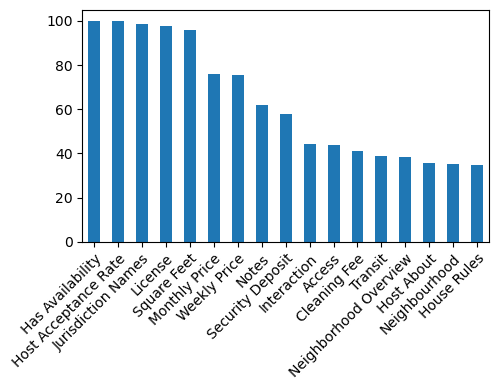

In [27]:
#| output: True
#| label: fig-na
#| fig-cap: "Percentage of missing values by feature (showing features with >30% NA values)"
na_plot(airbnb_data, threshold=30)

In [26]:
print(f'Number of features with NA value: {sum(airbnb_data.isna().sum() > 0)}')
print(f"Number of NA values for Price feature: {airbnb_data['Price'].isna().sum()}")

Number of features with NA value: 59
Number of NA values for Price feature: 17


In [ ]:
# TODO target feature and features for prediction

### Target feature.

The distribution of the `Price` feature shows a right-skewed to the right with a peak around 50 (@fig-price). Values range from 9.0 to 999.0. The target feature contains 17 NA values. This accommodations will be remove before training the model and could be used later for testing.

In [7]:
airbnb_data['Price'].describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

In [17]:
airbnb_data[airbnb_data['Price'] > 800][['Price', 'Bedrooms','City']]

,Price,Bedrooms,City
1587,875.0,5.0,Madrid
1933,850.0,10.0,Madrid
3385,907.0,1.0,Frederiksberg C
5825,999.0,4.0,Malibu
9671,969.0,1.0,Hong Kong
10762,828.0,4.0,Paris
14768,950.0,5.0,Son Vida


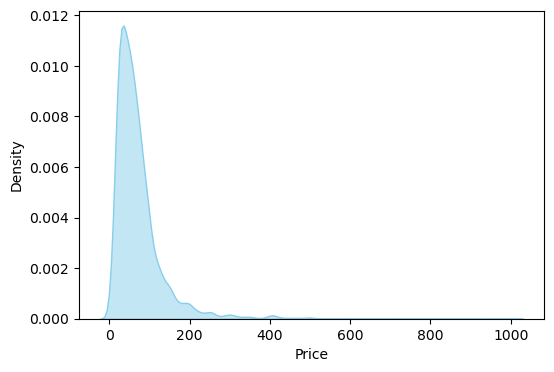

In [8]:
#| output: True
#| label: fig-price
#| fig-cap: "Distribution of the Price feature."
plot_density(airbnb_data, ['Price'], 1, 1)

### Features for prediction.


In [ ]:
# feature to be dropped (PREPROC)
# variables with more than 70% of their values as NA are discarded 
# there is not enough information for imputation.
features_na_drop = ['Has Availability', 'Host Acceptance Rate', 'Jurisdiction Names', 'License', 'Square Feet', 'Monthly Price', 'Weekly Price']

In [ ]:
# numeric/non numeric columns 
df_types = airbnb_data.dtypes
columns_non_num = df_types[df_types == 'object'].index
columns_num = df_types[df_types != 'object'].index
print(f'Number of non-numeric features: {len(columns_non_num)}\n')
print(', '.join(columns_non_num))
print(f'\nNumber of numeric features: {len(columns_num)}\n')
print(', '.join(columns_num))

Number of non-numeric features: 53

Listing Url, Last Scraped, Name, Summary, Space, Description, Experiences Offered, Neighborhood Overview, Notes, Transit, Access, Interaction, House Rules, Thumbnail Url, Medium Url, Picture Url, XL Picture Url, Host URL, Host Name, Host Since, Host Location, Host About, Host Response Time, Host Acceptance Rate, Host Thumbnail Url, Host Picture Url, Host Neighbourhood, Host Verifications, Street, Neighbourhood, Neighbourhood Cleansed, Neighbourhood Group Cleansed, City, State, Zipcode, Market, Smart Location, Country Code, Country, Property Type, Room Type, Bed Type, Amenities, Calendar Updated, Has Availability, Calendar last Scraped, First Review, Last Review, License, Jurisdiction Names, Cancellation Policy, Geolocation, Features

Number of numeric features: 36

ID, Scrape ID, Host ID, Host Response Rate, Host Listings Count, Host Total Listings Count, Latitude, Longitude, Accommodates, Bathrooms, Bedrooms, Beds, Square Feet, Price, Weekly Price, 

In [ ]:
# overview non-numeric columns that contain 'url', 'scraped', 'name', 'calendar' or 'host' strings
columns_sel = list(filter(lambda x: any(s in x.lower() for s in ['url', 'scraped', 'name', 'calendar', 'host']), columns_non_num))
print(f'Number of selected columns: {len(columns_sel)}')
airbnb_data[columns_sel].head().T

Number of selected columns: 21


,4706,6422,4339,1666,4578
Listing Url,https://www.airbnb.com/rooms/2156319,https://www.airbnb.com/rooms/3377153,https://www.airbnb.com/rooms/14800635,https://www.airbnb.com/rooms/11185674,https://www.airbnb.com/rooms/18092171
Last Scraped,2017-04-08,2017-04-08,2017-04-08,2017-04-08,2017-04-08
Name,GRANT VII Plaza Mayor,Nice flat in Plaza Mayor (lift),* ROOM double Barrio Salamanca *,cheap apartment in Madrid city cent,"ACOGEDOR APARTAMENTO EN MADRID, CALLE MANZANARES"
Thumbnail Url,NaN,https://a0.muscache.com/im/pictures/47295744/3...,https://a0.muscache.com/im/pictures/069c59b5-c...,https://a0.muscache.com/im/pictures/c2fea8e5-0...,https://a0.muscache.com/im/pictures/144dbcd9-c...
Medium Url,NaN,https://a0.muscache.com/im/pictures/47295744/3...,https://a0.muscache.com/im/pictures/069c59b5-c...,https://a0.muscache.com/im/pictures/c2fea8e5-0...,https://a0.muscache.com/im/pictures/144dbcd9-c...
Picture Url,https://public.opendatasoft.com/api/v2/catalog...,https://public.opendatasoft.com/api/v2/catalog...,https://public.opendatasoft.com/api/v2/catalog...,https://public.opendatasoft.com/api/v2/catalog...,https://public.opendatasoft.com/api/v2/catalog...
XL Picture Url,NaN,https://a0.muscache.com/im/pictures/47295744/3...,https://a0.muscache.com/im/pictures/069c59b5-c...,https://a0.muscache.com/im/pictures/c2fea8e5-0...,https://a0.muscache.com/im/pictures/144dbcd9-c...
Host URL,https://www.airbnb.com/users/show/1650712,https://www.airbnb.com/users/show/17037651,https://www.airbnb.com/users/show/88187861,https://www.airbnb.com/users/show/32747079,https://www.airbnb.com/users/show/123220020
Host Name,Ximena,Miguel,Adan,Cristian,Luz Adriana
Host Since,2012-01-25,2014-06-20,2016-08-05,2015-05-06,2017-03-29


In [ ]:
# overview non_numeric columns NOT containing 'url', 'scraped', 'name', 'calendar' or 'host' strings
columns_sel = list(filter(lambda x: not(any(s in x.lower() for s in ['url', 'scraped', 'name', 'calendar', 'host'])), columns_non_num))
print(f'Number of selected columns: {len(columns_sel)}')
airbnb_data[columns_sel].head().T

Number of selected columns: 32


,4706,6422,4339,1666,4578
Summary,NaN,"Flat is in the centre town, really close to Pl...","Private room for two persons has a double bed,...","Cheap apartment, next to Madrid rio, just four...","Acogedor apartamento, para parejas y/o familia."
Space,Beautiful and charming apartment recently deco...,You cannot find a better location to stay in M...,It is a penthouse located in the salamanca dis...,NaN,NaN
Description,Beautiful and charming apartment recently deco...,"Flat is in the centre town, really close to Pl...","Private room for two persons has a double bed,...","Cheap apartment, next to Madrid rio, just four...","Acogedor apartamento, para parejas y/o familia."
Experiences Offered,none,none,none,none,none
Neighborhood Overview,NaN,"It´s really cool, with a lot of new business (...",The District of Salamanca is one of the 21 dis...,NaN,NaN
Notes,NaN,"Apartment has wifi, lift, wash-machine and air...",It is important to know that the floor is shar...,NaN,NaN
Transit,NaN,"The best way is walking, since in Madrid all a...",Metro stations: * Lista 70 metres (line 4) fr...,NaN,NaN
Access,NaN,"The kitchen is available with oil, sugar, coff...","The common areas are completely free to use, l...",NaN,NaN
Interaction,NaN,You can call me if you have any doubt or if yo...,I will always be on the lookout for what you c...,NaN,NaN
House Rules,Rest hours: Monday to Friday from (phone numbe...,Just enjoy Madrid! You are in your home in Sp...,***Lo más importante pasarlo bien y que se si...,NO PARTY.,- No se admiten mascotas - No se admiten fiest...


In [ ]:
# features to be kept (PREPROC)
# variables are reviewed and an initial filtering of variables with no useful information is performed.
features_non_num_keep = ['Host Location', 'Host Neighbourhood', 'Experiences Offered', 'Neighbourhood', 'Neighbourhood Cleansed', 
                         'Neighbourhood Group Cleansed', 'City', 'State', 'Market', 'Smart Location', 'Country Code', 'Country', 
                         'Property Type', 'Room Type', 'Bed Type', 'Amenities', 'License', 'Cancellation Policy', 'Geolocation']

In [ ]:
# overview numeric columns
print(f'Number of selected columns: {len(columns_num)}')
airbnb_data[columns_num].head().T

Number of selected columns: 36


,4706,6422,4339,1666,4578
ID,2.156319e+06,3.377153e+06,1.480064e+07,1.118567e+07,1.809217e+07
Scrape ID,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017041e+13
Host ID,1.650712e+06,1.703765e+07,8.818786e+07,3.274708e+07,1.232200e+08
Host Response Rate,1.000000e+02,1.000000e+02,1.000000e+02,NaN,NaN
Host Listings Count,4.000000e+01,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00
Host Total Listings Count,4.000000e+01,1.000000e+00,3.000000e+00,1.000000e+00,4.000000e+00
Latitude,4.041542e+01,4.041113e+01,4.042805e+01,4.039645e+01,4.041345e+01
Longitude,-3.707123e+00,-3.707258e+00,-3.676042e+00,-3.714100e+00,-3.718438e+00
Accommodates,4.000000e+00,4.000000e+00,2.000000e+00,6.000000e+00,3.000000e+00
Bathrooms,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [ ]:
# features to be dropped 
# not have relevant information for a new accommodation that it is going to be offered for the first time
features_num_drop = ['ID', 'Scrape ID', 'Host ID', 'Host Response Rate', 'Host Listings Count', 'Host Total Listings Count', 
                     'Geolocation', 'Weekly Price', 'Monthly Price', 'Security Deposit', 
                     'Cleaning Fee','Extra People','Minimum Nights', 'Maximum Nights', 'Availability 30', 'Availability 60', 'Availability 90', 
                     'Availability 365', 'Number of Reviews', 'Review Scores Rating', 'Review Scores Accuracy', 'Review Scores Cleanliness', 
                     'Review Scores Checkin', 'Review Scores Communication', 'Review Scores Location', 'Review Scores Value', 
                     'Calculated host listings count', 'Reviews per Month']

In [ ]:
# result from first filtering step (PREPROC)
features_non_num_drop = [feature for feature in columns_non_num if not(feature in features_non_num_keep)]
features_clean1_drop = features_non_num_drop + features_num_drop + features_na_drop
df_train_clean = airbnb_data.drop(features_clean1_drop, axis = 1)
print(f'Number of features: {df_train_clean.shape[1]}\n')
print(', '.join(df_train_clean.columns.tolist()))

Number of features: 25

Experiences Offered, Host Location, Host Neighbourhood, Neighbourhood, Neighbourhood Cleansed, Neighbourhood Group Cleansed, City, State, Market, Smart Location, Country Code, Country, Latitude, Longitude, Property Type, Room Type, Accommodates, Bathrooms, Bedrooms, Beds, Bed Type, Amenities, Price, Guests Included, Cancellation Policy


In [ ]:
df_train_clean.head().T

,4706,6422,4339,1666,4578
Experiences Offered,none,none,none,none,none
Host Location,"Madrid, Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain","Madrid, Community of Madrid, Spain",ES
Host Neighbourhood,La Latina,La Latina,Goya,Carabanchel,Sol
Neighbourhood,Sol,La Latina,NaN,Carabanchel,Imperial
Neighbourhood Cleansed,Sol,Embajadores,Goya,Comillas,Imperial
Neighbourhood Group Cleansed,Centro,Centro,Salamanca,Carabanchel,Arganzuela
City,Madrid,Madrid,Madrid,Madrid,Madrid
State,Community of Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid,Comunidad de Madrid
Market,Madrid,Madrid,Madrid,Madrid,Madrid
Smart Location,"Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain","Madrid, Spain"


# TODO copy second selection of features
# TODO Finish with a number of features to consider
# TODO Feature visalization (Features for prediction)